<a href="https://colab.research.google.com/github/Harshksaw/Machine-Learning/blob/master/stock_market_predML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Live Stock Price Data using Yahoo finance Api

In [1]:
pip install numpy pandas yfinance matplotlib tensorflow


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/a6/78/62db7f2fb2f13fc4b211676668a5a9d20542a6c774d4f6a9ce0000d71347/yfinance-0.2.27-py2.py3-none-any.whl.metadata
  Using cached yfinance-0.2.27-py2.py3-none-any.whl.metadata (11 kB)
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/5a/f2/5c2f878c62c8b79c629b11b33516bb55054d7677eba6f56f3a20296b56bd/tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/3c/d2/11533f0bc47ff4d828a20cfb702f3453fe714bd5b475fcdc8cec6e6b7dcf/lxml-4.9.3-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
  Using cached lxml-4.9.3-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.8 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached frozendict-2.3.8-cp310-cp310-manylinux_

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
import math
import matplotlib.pyplot as plt
import tensorflow


2023-08-05 05:24:46.261021: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 05:24:49.359451: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-05 05:24:49.375655: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-05 05:24:53.931331: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days = 2000)
d2.strftime("%Y-%m-%d")
start_date = d2


In [4]:
data = yf.download('MSFT' ,start = start_date ,end = end_date, progress = False)

#Importing Data and Ploting 

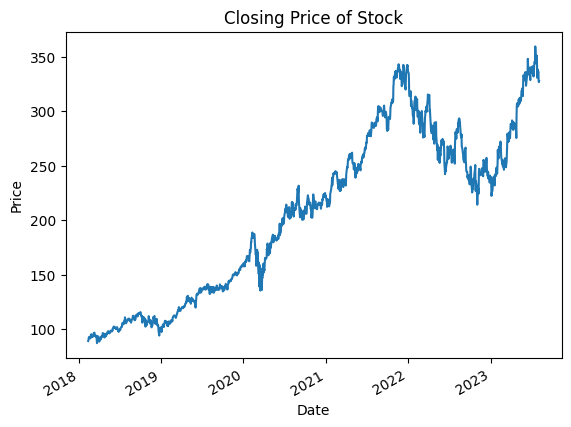

In [5]:
# Set the 'Date' column as the index
# data.set_index('Date', inplace=True)
data['Close'].plot(title='Closing Price of Stock', xlabel='Date', ylabel='Price')
plt.show()

In [6]:
pip install statsmodels


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 11.5 MB/s eta 0:00:00


Note: you may need to restart the kernel to use updated packages.


In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

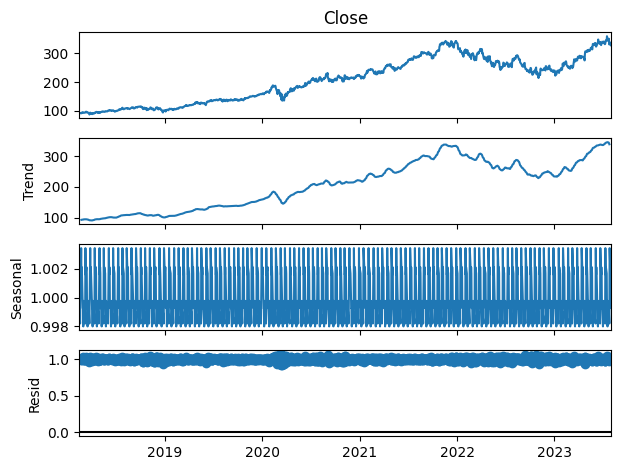

In [8]:
# data.index = data['Date']
results = seasonal_decompose(data['Close'],model = 'multiplicative' , period = 12)
results.plot();

In [9]:
data["Date"] = data.index
data = data[["Date" , "Open" ,"High", "Low","Close","Volume"]]
data.reset_index(drop = True,inplace = True)

In [10]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-12,88.739998,89.779999,87.930000,89.129997,35720300
1,2018-02-13,88.930000,90.000000,87.800003,89.830002,26407700
2,2018-02-14,88.510002,90.989998,88.410004,90.809998,34960900
3,2018-02-15,91.209999,92.720001,90.620003,92.660004,27823900
4,2018-02-16,92.449997,93.500000,91.800003,92.000000,30596900


Seasonal decomposition is a technique used to break down a time series into its trend, seasonal, and residual
-> If the magnitude of the seasonal component changes with time, then the series is multiplicative. so we have taken multiplicative here -> Multiplicative: x t = Trend * Seasonal * Random

In [11]:
data.shape

(1379, 6)

In [12]:
data['Close']

0        89.129997
1        89.830002
2        90.809998
3        92.660004
4        92.000000
           ...    
1374    335.920013
1375    336.339996
1376    327.500000
1377    326.660004
1378    327.779999
Name: Close, Length: 1379, dtype: float64

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

Making moving average ma100 -> moving average 100 ma50 -> moving average 50


In [14]:
ma100 = data.Close.rolling(100).mean()
ma50 = data.Close.rolling(50).mean()
ma200 = data.Close.rolling(200).mean()

Observation -> When the moving average of 50 periods crosses above the moving average of 100 periods, it is often seen as a bullish signal in technical analysis. Conversely, when the 50-period moving average crosses below the 100-period moving average, it is often seen as a bearish signal.
-> Looking at bigger picture When a long-term moving average, such as the 200-day moving average, crosses above or below a short-term moving average, such as the 100-day moving average, it is known as a "moving average crossover." This is a common technical analysis signal used by traders and investors to identify potential changes in trend

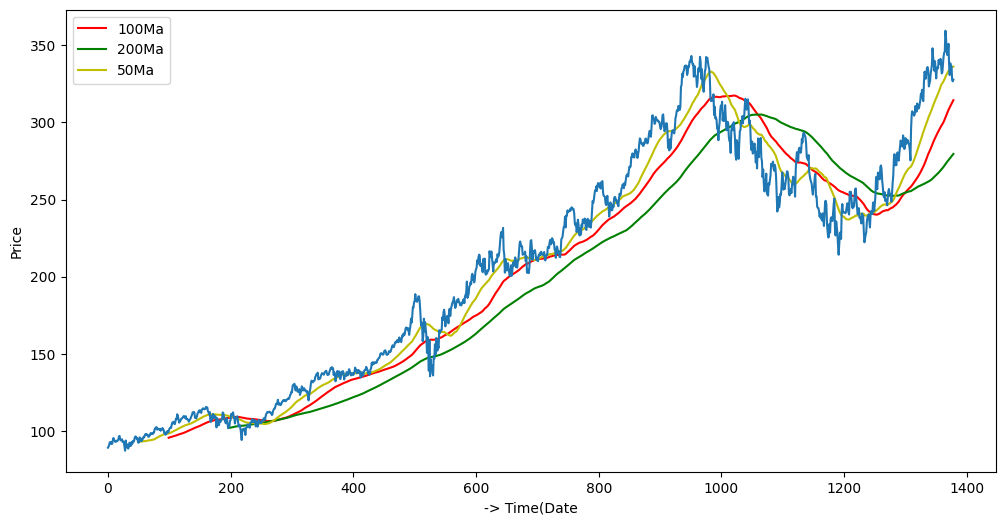

In [15]:
plt.figure(figsize = (12,6)) 
plt.plot(ma100,color ='r', label ="100Ma")
plt.plot(ma200,color ='g', label ="200Ma")
plt.plot(ma50,color ='y' ,label ="50Ma")
plt.xlabel("-> Time(Date")
plt.ylabel("Price")
plt.legend()
plt.plot(data.Close)

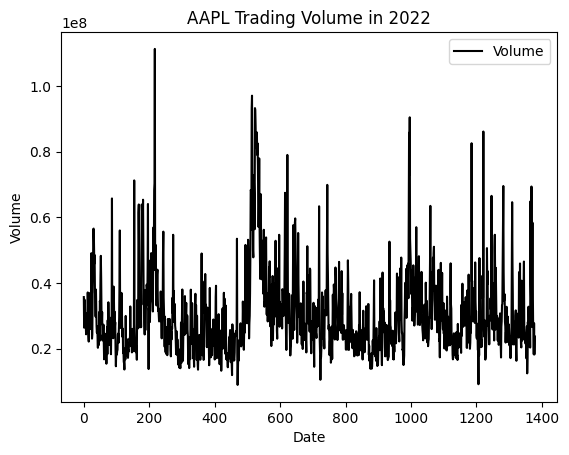

In [16]:
data['Volume'].plot(style='k-', title='AAPL Trading Volume in 2022', xlabel='Date', ylabel='Volume') 
plt.legend()

In [17]:
df =data
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-12,88.739998,89.779999,87.930000,89.129997,35720300
1,2018-02-13,88.930000,90.000000,87.800003,89.830002,26407700
2,2018-02-14,88.510002,90.989998,88.410004,90.809998,34960900
3,2018-02-15,91.209999,92.720001,90.620003,92.660004,27823900
4,2018-02-16,92.449997,93.500000,91.800003,92.000000,30596900


In [18]:
df = df.reset_index()['Close']
df.shape

(1379,)

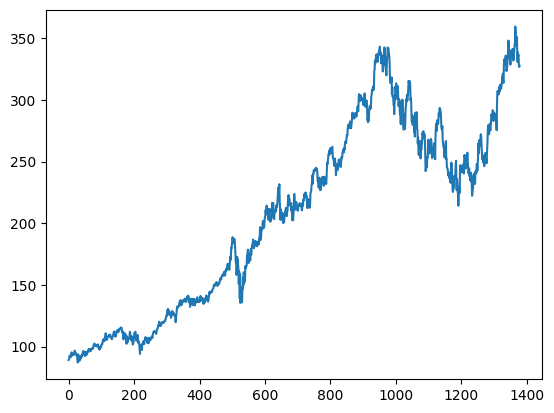

In [19]:
plt.plot(df) #data set we will work with for training 

LSTM model are sensitive to scale of the data. so we apply MinMaxScaler


In [20]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [22]:
df


array([[0.00716095],
       [0.00973156],
       [0.01333039],
       ...,
       [0.88252363],
       [0.87943892],
       [0.88355186]])

Splitting the data into train and test split

In [23]:
training_size = int(len(df)* 0.75)
test_size = len(df) - training_size

train_data , test_data = df[0: training_size], df[training_size : len(df),  :1]

In [24]:
len(train_data), len(test_data)

(1034, 345)

In [25]:
#create an array of values into a dataset matrix
# function ->

def dataset_reshape(dataset , time_steps = 1):
  dataX , dataY = [],[]
  for i in range(len(dataset)-time_steps -1):
    a = dataset[i : (i + time_steps) , 0]  # 1 ,2 ,3 -- 100  , append(101)
    dataX.append(a)
    dataY.append(dataset[i + time_steps, 0])
  return np.array(dataX), np.array(dataY)

In [26]:
time_steps = 100
X_train , y_train = dataset_reshape(train_data , time_steps )
X_test , y_test = dataset_reshape(test_data , time_steps)

In [27]:
print(X_train.shape)

(933, 100)


In [28]:
#convert in into 3D dimensional 
# [samples, time_steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] , 1)

In [29]:
# X_train[2]

MODEL ->

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM

In [31]:
model = Sequential()
model.add(LSTM(50 , return_sequences = True, input_shape = (100, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dropout_2 (Dropout)         (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2

MODEL TRAINING ->

In [33]:
model.fit(X_train,y_train,batch_size =32,epochs = 1)

30/30 [==============================] - 6s 72ms/step - loss: 0.0246


In [34]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/30 [============>.................] - ETA: 0s

8/8 [==============================] - 0s 17ms/step


In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
train_predict.shape
test_predict.shape

(244, 1)

In [37]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


206.79018492626878

In [38]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))


274.8491018713106

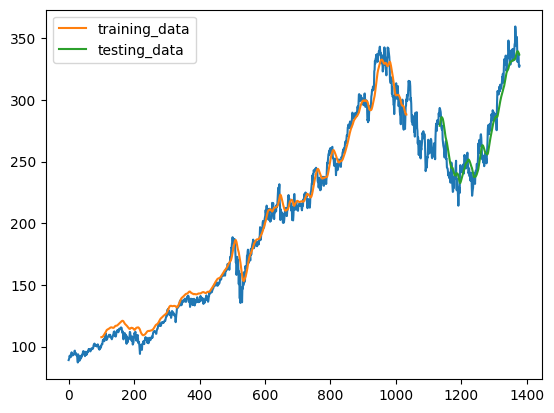

In [39]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan

# . Then, np.nan is used to set all the elements of trainPredictPlot and testPredictPlot to NaN, which creates a blank plot.

trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# train_predict and test_predict are arrays containing the predicted values from the model's training and testing sets, respectively. 
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot , label = 'training_data' ,)
plt.plot(testPredictPlot, label = 'testing_data')
plt.legend()
plt.show()

**PREDDICTING FUTURE 30 days


In [40]:
len(test_data)

345

In [41]:
x_input = test_data[44 : ].reshape(1,-1)
x_input.shape

(1, 301)

In [42]:
temp_input = list(x_input) #converting it into list
temp_input = temp_input[0].tolist()


In [43]:
temp_input

[0.6332488751398591,
 0.6438984803829071,
 0.6563108229623744,
 0.6832653843422158,
 0.6782343712767616,
 0.6802541954877277,
 0.6881862333284725,
 0.6714406208748882,
 0.6667768587631786,
 0.6805479290091692,
 0.6728728659737144,
 0.6522346399628043,
 0.6089016610484947,
 0.5694979983730346,
 0.5776872351575828,
 0.6043847096628776,
 0.5794499164593736,
 0.5892916144318867,
 0.6116558750976928,
 0.6094157787629599,
 0.6304579023745094,
 0.6629210039220037,
 0.6526018909165487,
 0.6217179572632296,
 0.6355991915884178,
 0.6230031674974501,
 0.6331019523445098,
 0.6451103973233379,
 0.6574492224705024,
 0.6654915364597014,
 0.6627740811266547,
 0.6512064045338739,
 0.6113987882231462,
 0.6079101283010875,
 0.6129044386850186,
 0.6225992698968108,
 0.6135287204786815,
 0.632918382902266,
 0.6429804090331743,
 0.6524182094050481,
 0.6359663304729057,
 0.6303477382953118,
 0.6048988273773428,
 0.666740100047027,
 0.6949065783672994,
 0.7108075248341972,
 0.7007822574194402,
 0.689067658031

In [44]:
diff = np.diff(temp_input)
print(diff.sum())

0.25030298623943614


LOGIC for prediction of next -> days

In [45]:
list_output = []
n_steps = 300  #->Timesteps
i = 0
while(i<60):

  if(len(temp_input) > 300):
    #printing the temp input
    x_input = np.array(temp_input[1:])
    print("{} day input ->{} ".format(i,x_input))
    x_input = x_input.reshape(1 , -1)
    x_input = x_input.reshape((1, n_steps , 1))
    yhat  = model.predict(x_input , verbose = 0)
    print("{} day output -> {}".format(i,yhat))
    # yhat is a variable that holds the output of the model's prediction.
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    list_output.extend(yhat.tolist())
    i = i+ 1

  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose = 0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    # Overall, this line of code is adding the predicted value(s) from the model to temp_input,
    #  which is presumably being used as input for the model's next prediction.
    print(len(temp_input))
    list_output.extend(yhat.tolist())
    i = i+1

# print(list_output)

0 day input ->[0.64389848 0.65631082 0.68326538 0.67823437 0.6802542  0.68818623
 0.67144062 0.66677686 0.68054793 0.67287287 0.65223464 0.60890166
 0.569498   0.57768724 0.60438471 0.57944992 0.58929161 0.61165588
 0.60941578 0.6304579  0.662921   0.65260189 0.62171796 0.63559919
 0.62300317 0.63310195 0.6451104  0.65744922 0.66549154 0.66277408
 0.6512064  0.61139879 0.60791013 0.61290444 0.62259927 0.61352872
 0.63291838 0.64298041 0.65241821 0.63596633 0.63034774 0.60489883
 0.6667401  0.69490658 0.71080752 0.70078226 0.68906766 0.71716062
 0.72149389 0.71877643 0.70926523 0.71653628 0.74172822 0.73386947
 0.751827   0.75755576 0.75476479 0.74966037 0.74543726 0.7306746
 0.69982743 0.69501674 0.69262978 0.70386696 0.66435314 0.65385045
 0.64555105 0.64004263 0.63611325 0.62017555 0.60985644 0.62763028
 0.62920934 0.65102272 0.65906504 0.60522938 0.60607399 0.58095557
 0.57860531 0.5777974  0.57019574 0.55734274 0.56479748 0.55356029
 0.55183431 0.54801516 0.56512803 0.55201794 0.53

18 day output -> [[0.87697554]]
19 day input ->[0.6304579  0.662921   0.65260189 0.62171796 0.63559919 0.62300317
 0.63310195 0.6451104  0.65744922 0.66549154 0.66277408 0.6512064
 0.61139879 0.60791013 0.61290444 0.62259927 0.61352872 0.63291838
 0.64298041 0.65241821 0.63596633 0.63034774 0.60489883 0.6667401
 0.69490658 0.71080752 0.70078226 0.68906766 0.71716062 0.72149389
 0.71877643 0.70926523 0.71653628 0.74172822 0.73386947 0.751827
 0.75755576 0.75476479 0.74966037 0.74543726 0.7306746  0.69982743
 0.69501674 0.69262978 0.70386696 0.66435314 0.65385045 0.64555105
 0.64004263 0.63611325 0.62017555 0.60985644 0.62763028 0.62920934
 0.65102272 0.65906504 0.60522938 0.60607399 0.58095557 0.57860531
 0.5777974  0.57019574 0.55734274 0.56479748 0.55356029 0.55183431
 0.54801516 0.56512803 0.55201794 0.5351254  0.56391616 0.59380857
 0.59498367 0.58613345 0.54004631 0.52172159 0.50762002 0.50886859
 0.54004631 0.5191877  0.5521281  0.55569023 0.54827219 0.54706033
 0.56898388 0.58782

In [46]:
print(list_output) 
#predicted 60 days values -> 

[[0.9079903364181519], [0.9045702815055847], [0.9017783999443054], [0.8994144797325134], [0.8973437547683716], [0.8954752683639526], [0.8937484622001648], [0.892122745513916], [0.8905712366104126], [0.8890759944915771], [0.8876248002052307], [0.88620924949646], [0.8848236203193665], [0.883463978767395], [0.8821271657943726], [0.8808113932609558], [0.8795149326324463], [0.8782364726066589], [0.8769755363464355], [0.8757312297821045], [0.8745028376579285], [0.8732898831367493], [0.8720924258232117], [0.8709098100662231], [0.8697416186332703], [0.8685879111289978], [0.8674483895301819], [0.8663227558135986], [0.865210771560669], [0.8641122579574585], [0.8630272150039673], [0.8619552254676819], [0.8608959913253784], [0.8598496913909912], [0.8588158488273621], [0.8577943444252014], [0.8567848801612854], [0.8557876348495483], [0.8548020720481873], [0.8538283109664917], [0.8528659343719482], [0.8519148230552673], [0.8509750962257385], [0.8500461578369141], [0.8491278886795044], [0.84822052717

In [47]:
day_new = np.arange(1,301)
day_pred = np.arange(301,361)

In [48]:
len(df)

1379

In [49]:
df2 = df.tolist()

In [50]:
# plotting from previous 100 days so ->

start_date = len(df) -300
start_date

1079

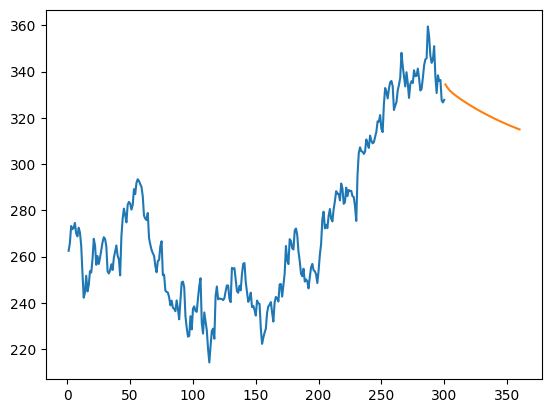

In [51]:
plt.plot(day_new , scaler.inverse_transform(df[start_date :])) #ploting the graph from dataset we had trained our model on
plt.plot(day_pred ,scaler.inverse_transform(list_output))  #Out predicted next 30 days data , predicted from the model we trained out datset


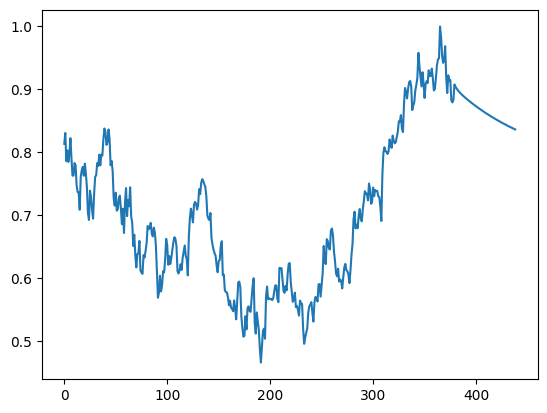

In [52]:
df2 = df.tolist()
df2.extend(list_output)
plt.plot(df2[1000:])

In [53]:
model.save('your_model.keras')


In [54]:
model.save('your_model')

INFO:tensorflow:Assets written to: your_model/assets


INFO:tensorflow:Assets written to: your_model/assets
